# Petr a vlk: Úvod do posilovaného učení

V tomto tutoriálu se naučíme, jak aplikovat posilované učení na problém hledání cesty. Scénář je inspirován hudební pohádkou [Petr a vlk](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) od ruského skladatele [Sergeje Prokofjeva](https://en.wikipedia.org/wiki/Sergei_Prokofiev). Je to příběh o mladém pionýrovi Petrovi, který se odvážně vydává z domu na lesní mýtinu, aby pronásledoval vlka. Vytrénujeme algoritmy strojového učení, které Petrovi pomohou prozkoumat okolní oblast a vytvořit optimální navigační mapu.

Nejprve si naimportujeme několik užitečných knihoven:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Přehled posilovaného učení

**Posilované učení** (RL) je technika učení, která nám umožňuje naučit se optimální chování **agenta** v určitém **prostředí** prostřednictvím mnoha experimentů. Agent v tomto prostředí by měl mít nějaký **cíl**, definovaný pomocí **funkce odměny**.

## Prostředí

Pro zjednodušení si představme Petrovo prostředí jako čtvercovou desku o velikosti `width` x `height`. Každé pole na této desce může být:
* **zem**, po které mohou Petr a další bytosti chodit
* **voda**, po které se samozřejmě nemůžete pohybovat
* **strom** nebo **tráva** - místo, kde si můžete odpočinout
* **jablko**, které představuje něco, co by Petr rád našel, aby se mohl najíst
* **vlk**, který je nebezpečný a je třeba se mu vyhnout

Pro práci s prostředím definujeme třídu `Board`. Abychom tento notebook příliš nezaplnili, přesunuli jsme veškerý kód pro práci s deskou do samostatného modulu `rlboard`, který nyní importujeme. Můžete se podívat do tohoto modulu, abyste získali více informací o interních detailech implementace.


Pojďme nyní vytvořit náhodnou desku a podívat se, jak vypadá:


In [4]:
# code block 1

## Akce a pravidla

V našem příkladu by Peterovým cílem bylo najít jablko, zatímco se vyhýbá vlkovi a dalším překážkám. Definujte tyto akce jako slovník a přiřaďte je k dvojicím odpovídajících změn souřadnic.


In [5]:
# code block 2

Strategie našeho agenta (Petra) je definována takzvanou **politikou**. Podívejme se na nejjednodušší politiku nazvanou **náhodná procházka**.

## Náhodná procházka

Nejprve vyřešme náš problém implementací strategie náhodné procházky.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Funkce odměny

Abychom naši politiku učinili chytřejší, musíme pochopit, které tahy jsou „lepší“ než jiné.


In [8]:
#code block 5

## Q-Learning

Vytvořte Q-Tabulku, nebo vícerozměrné pole. Protože naše hrací plocha má rozměry `width` x `height`, můžeme Q-Tabulku reprezentovat pomocí numpy pole s tvarem `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Předajte Q-Tabulku funkci `plot`, abyste zobrazili tabulku na desce:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Podstata Q-Learning: Bellmanova rovnice a učící algoritmus

Napište pseudokód pro náš učící algoritmus:

* Inicializujte Q-Tabulku Q stejnými hodnotami pro všechny stavy a akce
* Nastavte učící rychlost $\alpha\leftarrow 1$
* Opakujte simulaci mnohokrát
   1. Začněte na náhodné pozici
   1. Opakujte
        1. Vyberte akci $a$ ve stavu $s$
        2. Proveďte akci přesunem do nového stavu $s'$
        3. Pokud narazíme na podmínku konce hry nebo je celková odměna příliš malá - ukončete simulaci  
        4. Spočítejte odměnu $r$ v novém stavu
        5. Aktualizujte Q-Funkci podle Bellmanovy rovnice: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Aktualizujte celkovou odměnu a snižte $\alpha$.

## Využití vs. Průzkum

Nejlepší přístup je vyvážit průzkum a využití. Jak se o našem prostředí dozvídáme více, budeme pravděpodobněji následovat optimální cestu, avšak občas zvolíme neprozkoumanou cestu.

## Implementace v Pythonu

Nyní jsme připraveni implementovat učící algoritmus. Předtím však potřebujeme funkci, která převede libovolná čísla v Q-Tabulce na vektor pravděpodobností pro odpovídající akce:


In [10]:
# code block 7

Přidáme malé množství `eps` k původnímu vektoru, abychom se vyhnuli dělení nulou v počátečním případě, kdy všechny složky vektoru jsou shodné.

Skutečný učící algoritmus spustíme pro 5000 experimentů, také nazývaných **epochy**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Po provedení tohoto algoritmu by měla být Q-tabulka aktualizována hodnotami, které definují atraktivitu různých akcí v každém kroku. Vizualizujte tabulku zde:


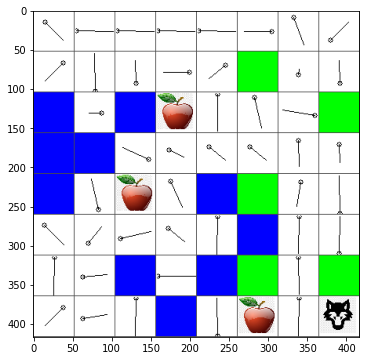

In [43]:
m.plot(Q)

## Kontrola politiky

Protože Q-Tabulka uvádí „atraktivitu“ každé akce v každém stavu, je poměrně snadné ji použít k definování efektivní navigace v našem světě. V nejjednodušším případě můžeme jednoduše vybrat akci odpovídající nejvyšší hodnotě v Q-Tabulce:


In [13]:
# code block 9

2

Pokud vyzkoušíte výše uvedený kód několikrát, můžete si všimnout, že se někdy prostě "zasekne" a je potřeba stisknout tlačítko STOP v notebooku, abyste jej přerušili.

> **Úkol 1:** Upravte funkci `walk` tak, aby omezila maximální délku cesty na určitý počet kroků (například 100), a sledujte, jak výše uvedený kód tuto hodnotu čas od času vrací.

> **Úkol 2:** Upravte funkci `walk` tak, aby se nevracela na místa, kde již dříve byla. Tím zabráníte tomu, aby se `walk` zacyklila, nicméně agent se stále může ocitnout "uvězněný" na místě, ze kterého není možné uniknout.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


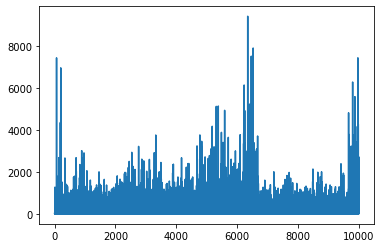

In [57]:
plt.plot(lpath)

## Cvičení
## Realističtější svět Petra a vlka



---

**Prohlášení**:  
Tento dokument byl přeložen pomocí služby pro automatický překlad [Co-op Translator](https://github.com/Azure/co-op-translator). I když se snažíme o co největší přesnost, mějte prosím na paměti, že automatické překlady mohou obsahovat chyby nebo nepřesnosti. Za autoritativní zdroj by měl být považován původní dokument v jeho původním jazyce. Pro důležité informace doporučujeme profesionální lidský překlad. Neodpovídáme za žádná nedorozumění nebo nesprávné výklady vyplývající z použití tohoto překladu.
